In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


# 데이터 불러오기
df = pd.read_csv("../Paramount_dataset/titles.csv")
# pd.set_option('display.max_rows', None)
# df[['imdb_id', 'imdb_score', 'tmdb_popularity', 'tmdb_score']]
df.isna().sum()
df


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm65789,Sunset Boulevard,MOVIE,A hack screenwriter writes a screenplay for a ...,1950,PG,110,['drama'],['US'],NaN,tt0043014,8.4,224704.0,18.431,8.366
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
2,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,79,"['comedy', 'drama', 'action', 'war', 'western'...",['US'],NaN,tt0017925,8.1,92935.0,12.316,8.009
4,tm122846,The Kid,MOVIE,A tramp cares for a boy after he's abandoned a...,1921,NaN,68,"['comedy', 'drama', 'family']",['US'],NaN,tt0012349,8.3,128096.0,14.865,8.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,ts374339,Sometimes When We Touch,SHOW,"The untold story of soft rock, whose artists d...",2023,TV-MA,48,"['documentation', 'history', 'music']",['US'],1.0,tt24512706,7.7,91.0,4.342,2.000
3178,ts361945,FBI True,SHOW,Takes viewers behind the scenes of the most co...,2023,TV-14,24,"['drama', 'documentation']",['US'],1.0,tt26895624,6.9,25.0,7.531,NaN
3179,ts378319,Lingo,SHOW,Host RuPaul Charles brings his one-of-a-kind p...,2023,NaN,42,['reality'],['US'],1.0,tt26082946,5.7,76.0,2.751,2.000
3180,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN


In [19]:
# 데이터셋 구조 파악
print("데이터셋 크기:", df.shape)
print("열(변수)의 개수:", len(df.columns))
print("열의 이름:", df.columns)

데이터셋 크기: (3182, 15)
열(변수)의 개수: 15
열의 이름: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [20]:
# 데이터셋 살펴보기 (상위 5개 데이터 출력)
print("\n상위 5개 데이터:")
print(df.head())


상위 5개 데이터:
         id             title   type  \
0   tm65789  Sunset Boulevard  MOVIE   
1   tm83884   His Girl Friday  MOVIE   
2    tm5012         Red River  MOVIE   
3   tm19248       The General  MOVIE   
4  tm122846           The Kid  MOVIE   

                                         description  release_year  \
0  A hack screenwriter writes a screenplay for a ...          1950   
1  Hildy, the journalist former wife of newspaper...          1940   
2  Headstrong Thomas Dunson starts a thriving Tex...          1948   
3  During America’s Civil War, Union spies steal ...          1926   
4  A tramp cares for a boy after he's abandoned a...          1921   

  age_certification  runtime  \
0                PG      110   
1               NaN       92   
2               NaN      133   
3               NaN       79   
4               NaN       68   

                                              genres production_countries  \
0                                          ['drama']    

In [21]:
# 기본적인 통계 분석
print("\n수치형 열의 기술 통계량:")
print(df.describe())


수치형 열의 기술 통계량:
       release_year      runtime     seasons   imdb_score    imdb_votes  \
count   3182.000000  3182.000000  664.000000  2975.000000  2.972000e+03   
mean    1993.174104    74.806411    3.977410     6.067160  2.525229e+04   
std       30.639396    31.113905    5.264735     1.276696  1.003005e+05   
min     1912.000000     0.000000    1.000000     1.400000  5.000000e+00   
25%     1970.000000    50.000000    1.000000     5.300000  1.710000e+02   
50%     2009.000000    81.000000    2.000000     6.100000  6.990000e+02   
75%     2017.000000    95.000000    5.000000     7.000000  5.453500e+03   
max     2023.000000   353.000000   50.000000     9.300000  1.870426e+06   

       tmdb_popularity   tmdb_score  
count      3134.000000  2744.000000  
mean         13.443530     6.084723  
std          44.952654     1.448689  
min           0.009442     1.000000  
25%           1.400000     5.200000  
50%           3.142500     6.100000  
75%           9.766500     7.000000  
max 

In [22]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())


결측치 개수:
id                         0
title                      0
type                       0
description               11
release_year               0
age_certification       1640
runtime                    0
genres                     0
production_countries       0
seasons                 2518
imdb_id                  148
imdb_score               207
imdb_votes               210
tmdb_popularity           48
tmdb_score               438
dtype: int64


In [23]:
# 범주형 열의 고유값 개수
print("\n범주형 열의 고유값 개수:")
for column in df.select_dtypes(include='object'):
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")


범주형 열의 고유값 개수:
id: 3182 unique values
title: 3150 unique values
type: 2 unique values
description: 3170 unique values
age_certification: 11 unique values
genres: 1022 unique values
production_countries: 155 unique values
imdb_id: 3034 unique values


In [24]:
# 열간 상관관계
print("\n열간 상관관계:")
print(df.corr())


열간 상관관계:
                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000 -0.107451 -0.480145    0.065629    0.061295   
runtime             -0.107451  1.000000 -0.005010   -0.106545    0.309341   
seasons             -0.480145 -0.005010  1.000000   -0.037133    0.161453   
imdb_score           0.065629 -0.106545 -0.037133    1.000000    0.245947   
imdb_votes           0.061295  0.309341  0.161453    0.245947    1.000000   
tmdb_popularity      0.113165 -0.016803  0.253456    0.170946    0.208720   
tmdb_score           0.175965 -0.140801  0.017048    0.595433    0.210665   

                 tmdb_popularity  tmdb_score  
release_year            0.113165    0.175965  
runtime                -0.016803   -0.140801  
seasons                 0.253456    0.017048  
imdb_score              0.170946    0.595433  
imdb_votes              0.208720    0.210665  
tmdb_popularity         1.000000    0.221046  
tmdb_score              0.221046    1.000000

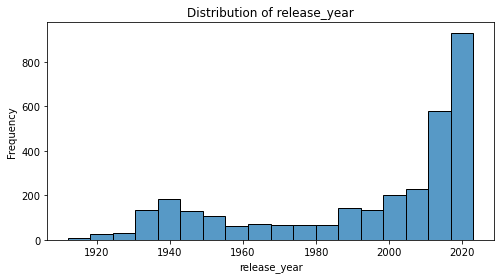

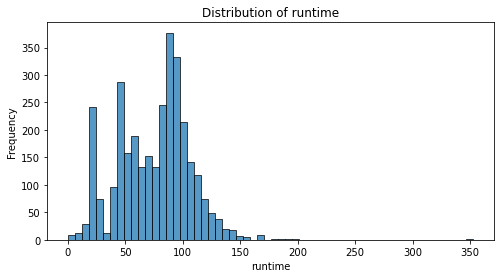

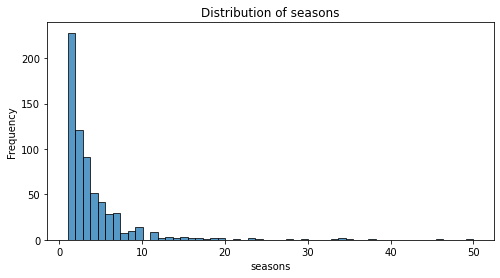

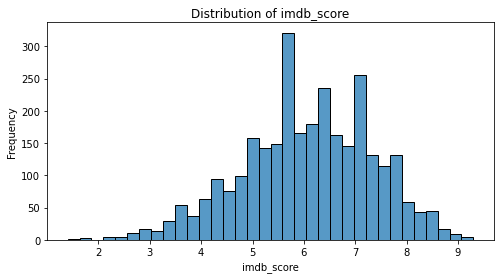

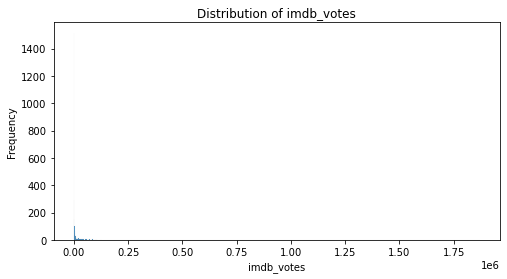

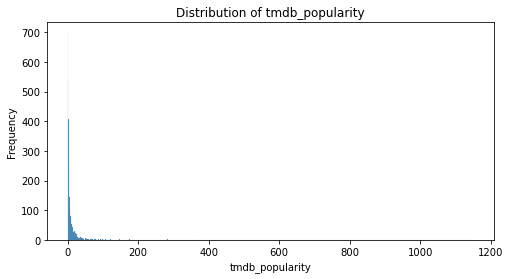

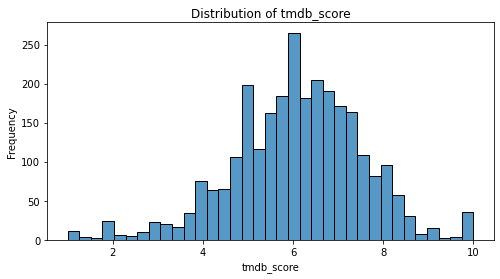

In [25]:
# 수치형 열의 분포 시각화
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna())
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [26]:
# 범주형 열의 빈도수 시각화 (id, title, description 열 제외)
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns = [column for column in categorical_columns if column not in ['id', 'title', 'description', 'genres']]

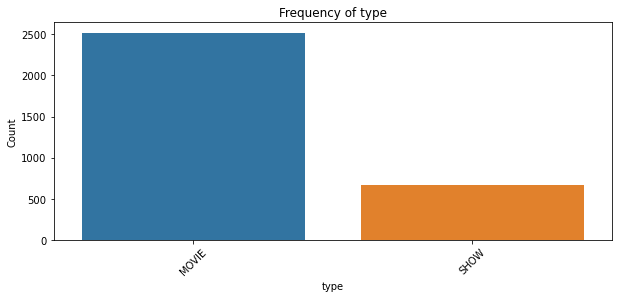

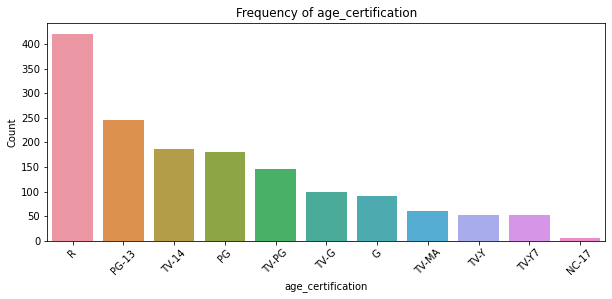

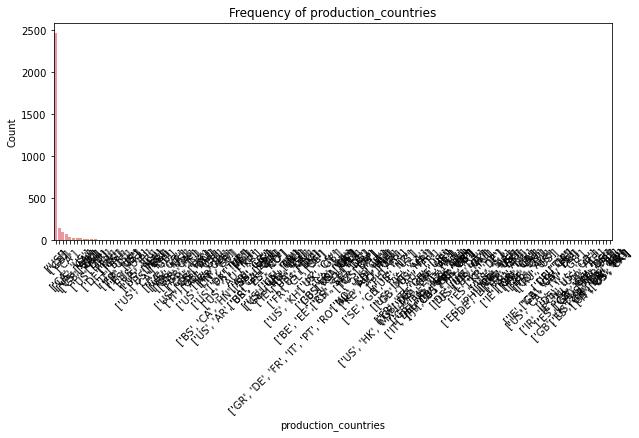

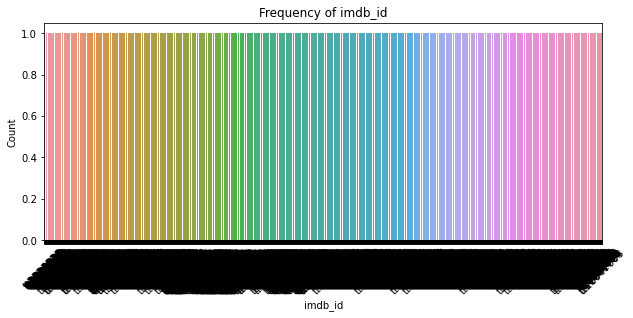

In [27]:
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [28]:
# genre 열의 데이터를 쉼표를 기준으로 분리하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(genre_list.split(','))

In [29]:
# 각 리스트의 원소를 포함하는 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in genre_list.split(','):
            genre = genre.strip()
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

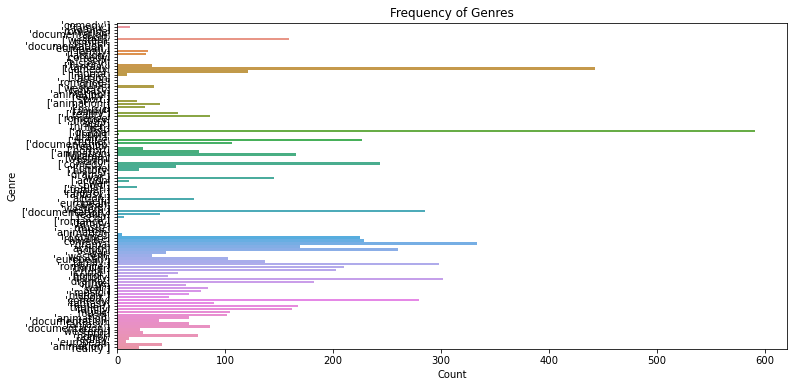

In [30]:
# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [31]:
# genre 열의 데이터를 쉼표를 기준으로 분리하여 알파벳만 남긴 문자열로 변환하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(re.findall(r'[a-zA-Z]+', genre_list))

In [32]:
# 각 문자열의 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in re.findall(r'[a-zA-Z]+', genre_list):
            genre = genre.lower()
            genre_counts[genre] += 1

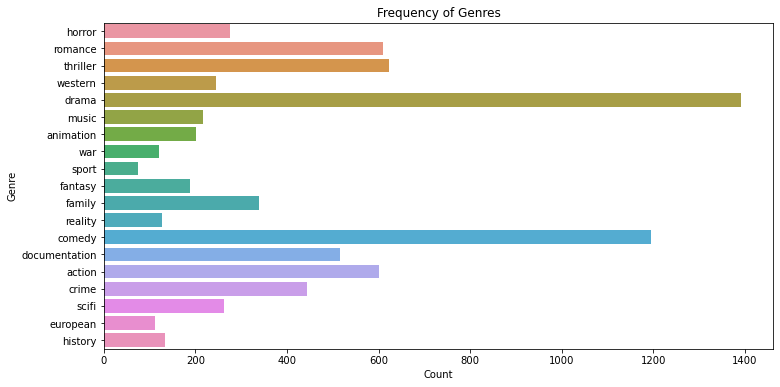

In [33]:
# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()